In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
url

'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

In [3]:
# dataframe
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
753,2014,MERCEDES-BENZ,E 63 AMG S 4MATIC WAGON,STATION WAGON - MID-SIZE,5.5,8,AS7,Z,15.5,11.0,13.5,21,310
1007,2014,TOYOTA,TUNDRA 4WD,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,18.1,13.9,16.2,17,373
82,2014,BMW,328i,COMPACT,2.0,4,M6,Z,10.4,6.7,8.7,32,200
597,2014,JEEP,WRANGLER 4X4 (2-DOOR),SUV - SMALL,3.6,6,M6,X,14.2,11.0,12.8,22,294
92,2014,BMW,428i COUPE,COMPACT,2.0,4,M6,Z,10.4,6.7,8.7,32,200


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis = 1)
df.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
526,3.7,6,12.0,8.0,10.2,28,235
725,3.5,6,16.4,11.1,14.0,20,224
254,1.8,4,8.9,6.7,7.9,36,182
327,3.6,6,19.2,13.1,16.5,17,264
193,6.2,8,19.7,12.9,16.6,17,382


In [6]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [7]:
# see the above table, we can tell that every column has high correlation with CO2 emission
# However, engine size has fairly high correlation with cylinder as well. So, eliminate cylinder column
# Fuel consumption has 4 columns, and comb mpg has the highest correlation
# thus, eliminate other 3
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)
df.sample(5)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
828,3.0,28,235
604,2.0,34,193
911,5.7,18,354
672,5.0,25,262
642,5.0,13,342


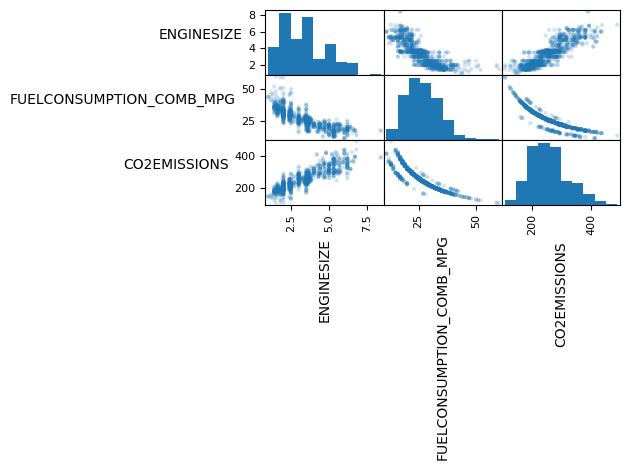

In [8]:
axes = pd.plotting.scatter_matrix(df, alpha = 0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.tight_layout()
plt.gcf().subplots_adjust(wspace = 0, hspace = 0)
plt.show()

array([<Axes: xlabel='ENGINESIZE', ylabel='FUELCONSUMPTION_COMB_MPG'>,
       <Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='FUELCONSUMPTION_COMB_MPG'>,
       <Axes: xlabel='CO2EMISSIONS', ylabel='FUELCONSUMPTION_COMB_MPG'>],
      dtype=object)

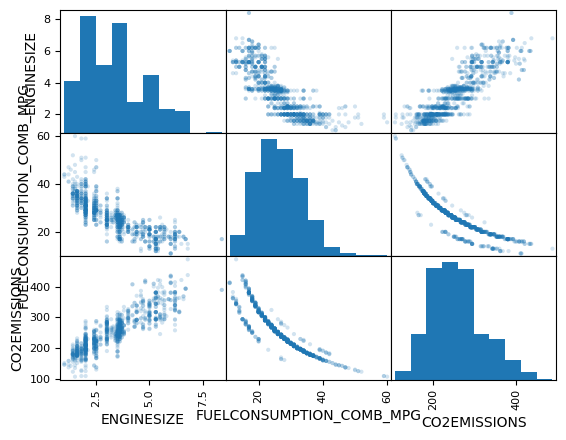

In [10]:
axes = pd.plotting.scatter_matrix(df, alpha = 0.2)

In [11]:
# extract the input features and labels from the dataset
x = df.iloc[:, [0, 1]].to_numpy()
y = df.iloc[:, [2]].to_numpy()

In [12]:
# standarize your input features so the model doesn't inadvertently favor any feature due to its magnitude
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
x_std = std_scaler.fit_transform(x)

In [13]:
pd.DataFrame(x_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2, random_state = 42)

In [21]:
from sklearn import linear_model
# create a model object
regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)
coef_ = regression.coef_
intercept_ = regression.intercept_
print('Coefficient: ', coef)
print('Intercept: ', intercept)

Coefficient:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


In [23]:
# get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)
# the least squares parameters can be calculated relative to the original, unstandardized
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)
print('Coefficient: ', coef_original)
print('Intercept: ', intercept_original)

Coefficient:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


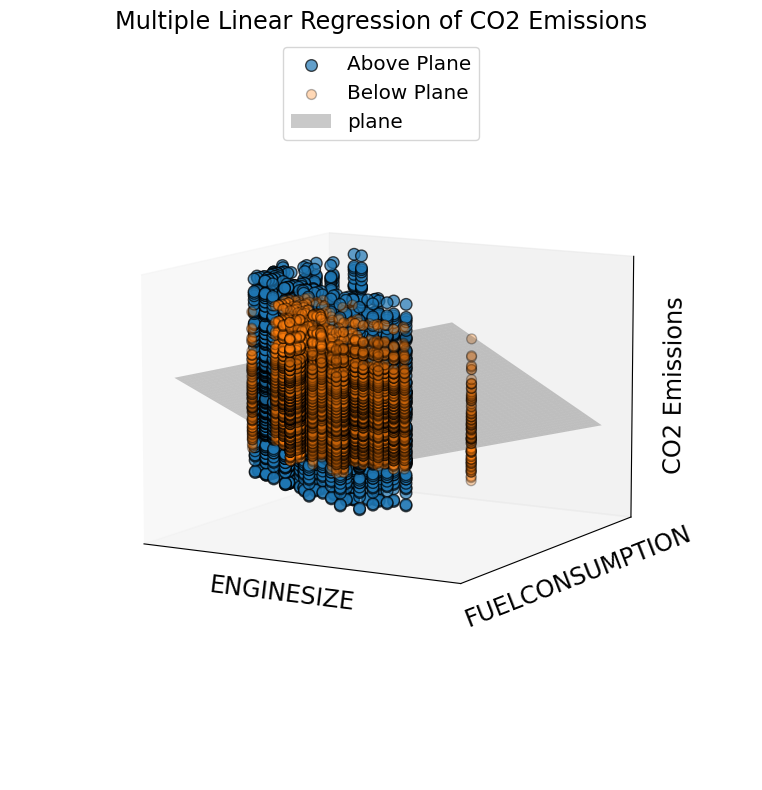

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# ensure x1, x2, and y_test have compatible shapes for 3D plotting
x1 = x_test[:, 0] if x_test.ndim > 1 else x_test
x2 = x_test[:, 1] if x_test.ndim > 1 else np.zeros_like(x1)
# create a mesh grid for plotting the regression line
x1_surf, x2_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 100),
                                np.linspace(x2.min(), x2.max(), 100))
y_surf = intercept + coef_[0, 0] * x1_surf + coef_[0, 1] * x2_surf
# predict y values using trained regression model to compare with actual y_test
y_pred = regression.predict(x_test.reshape(-1, 1)) if x_test.ndim == 1 else regression.predict(x_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:, 0]
below_plane = below_plane[:, 0]
# plotting
fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111, projection = '3d')
# plot the data points above and below the plane in different colors
ax.scatter(x1[above_plane], x2[above_plane], y_test[above_plane], label = 'Above Plane', s = 70, alpha = .7, ec = 'k')
ax.scatter(x1[below_plane], x2[below_plane], y_test[below_plane], label = 'Below Plane', s = 50, alpha = .3, ec = 'k')
# plot the regression line
ax.plot_surface(x1_surf, x2_surf, y_surf, color = 'k', alpha = 0.21, label = 'plane')
# set view and labels
ax.view_init(elev = 10)
ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()

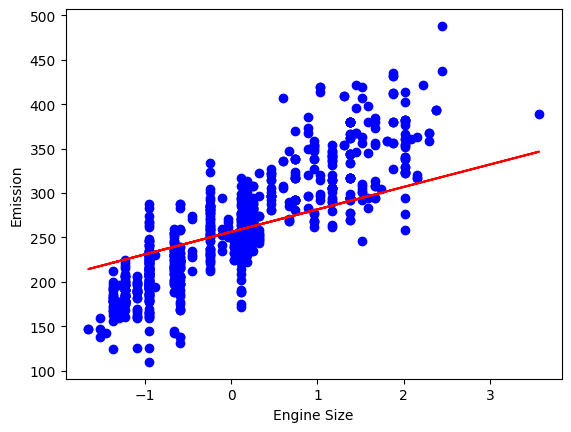

In [26]:
plt.scatter(x_train[:, 0], y_train, color = 'blue')
plt.plot(x_train[:, 0], coef_[0, 0] * x_train[:, 0] + intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

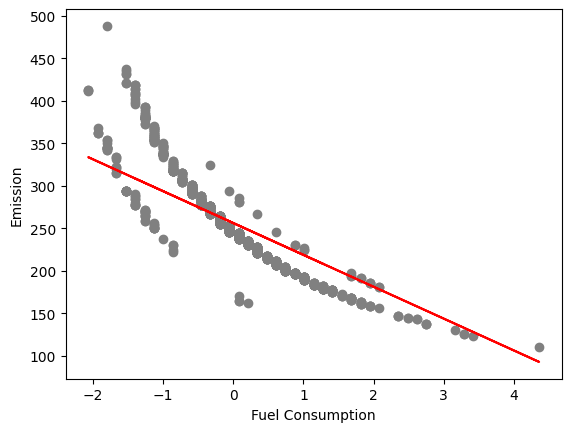

In [28]:
plt.scatter(x_train[:, 1], y_train, color = 'gray')
plt.plot(x_train[:, 1], coef_[0, 1] * x_train[:, 1] + intercept_[0], '-r')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emission')
plt.show()

In [34]:
x_train_1 = x_train[:, 0]
regression_1 = linear_model.LinearRegression()
regression_1.fit(x_train_1.reshape(-1, 1), y_train)
coef_1 = regression.coef_
intercept_1 = regression.intercept_
print('Coefficient: ', coef_1)
print('Intercept: ', intercept_1)

Coefficient:  [[55.18408797]]
Intercept:  [256.77183014]


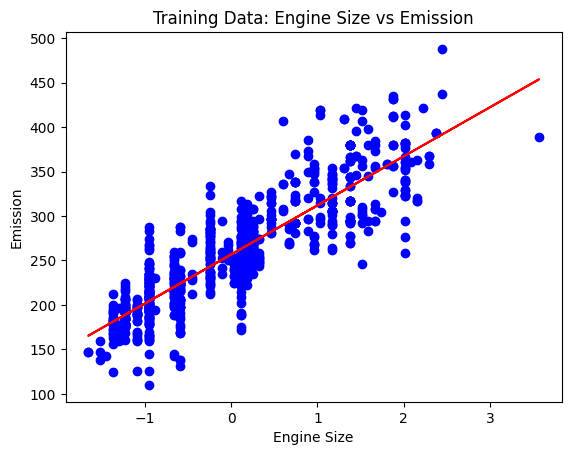

In [40]:
plt.scatter(x_train_1, y_train, color = 'blue')
plt.plot(x_train_1, coef_1[0] * x_train_1 + intercept_1, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('Training Data: Engine Size vs Emission')
plt.show()

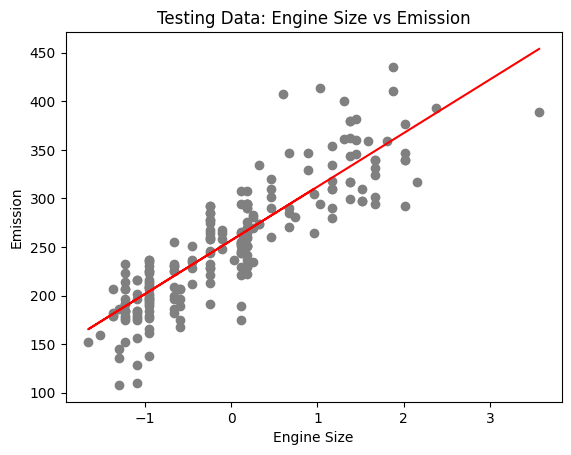

In [41]:
x_test_1 = x_test[:, 0]
plt.scatter(x_test_1, y_test, color = 'gray')
plt.plot(x_test_1, coef_1[0] * x_test_1 + intercept_1, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('Testing Data: Engine Size vs Emission')
plt.show()

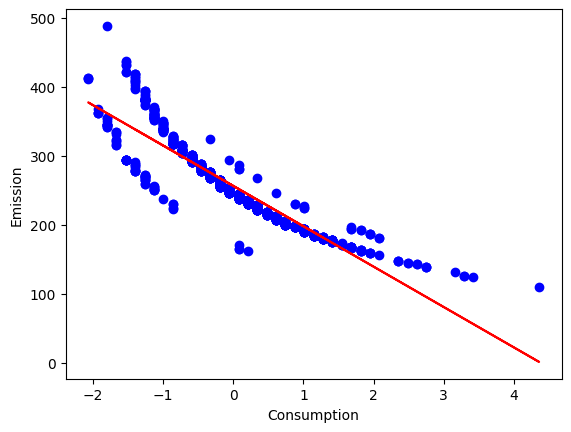

In [46]:
x_train_2 = x_train[:, 1]
regression_2 = linear_model.LinearRegression()
regression_2.fit(x_train_2.reshape(-1, 1), y_train)
coef_2 = regression_2.coef_
intercept_2 = regression_2.intercept_
plt.scatter(x_train_2, y_train, color = 'blue')
plt.plot(x_train_2, coef_2[0] * x_train_2 + intercept_2, '-r')
plt.xlabel('Consumption')
plt.ylabel('Emission')
plt.show()

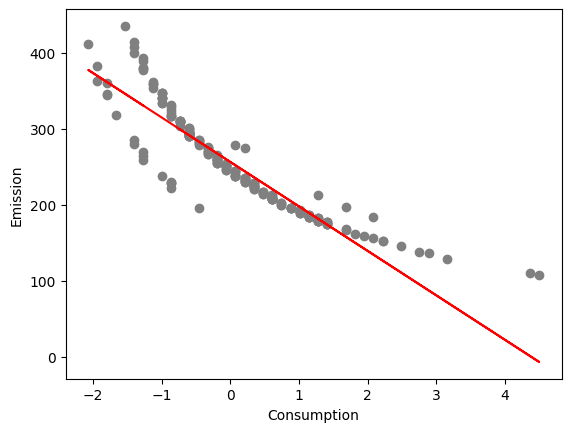

In [49]:
x_test_2 = x_test[:, 1]
plt.scatter(x_test_2, y_test, color = 'gray')
plt.plot(x_test_2, coef_2[0] * x_test_2 + intercept_2, '-r')
plt.xlabel('Consumption')
plt.ylabel('Emission')
plt.show()

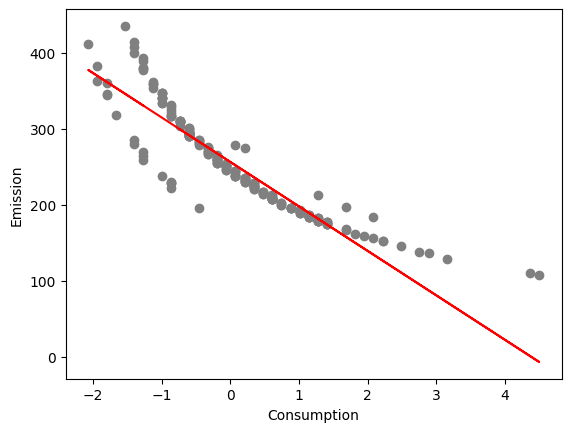

In [51]:
x_test_2 = x_test[:, 1]
y_pred = regression_2.predict(x_test_2.reshape(-1, 1))
plt.scatter(x_test_2, y_test, color = 'gray')
plt.plot(x_test_2, y_pred, '-r')
plt.xlabel('Consumption')
plt.ylabel('Emission')
plt.show()